# <font color = Purple > _Daelyn Oliveira_ <font>

## <font color = blue > _Module 5 Report<font> -<font color = blue> Retail_ <font>

## 1. Objective of the Proposed Research <br>

Maximum retail depends on the way shoppers are approached and being able to target appropriate shoppers. Being able to identify the target customers is the key to good retail business. <br>

The objective of any retail business should first be to learn who they're target shoppers are and then work on the strategy to approach and target them. <br>

This research is being done to make the most comprehensive analysis using the datasets provided and to achieve the $20,000 bonus Amazon is offering through the launch of Amazon Prime service. 

## 2. Data Exploration

We first import the data in csv format and also strings aren't converted to factors. 

In [1]:
features <- read.csv("Features data set.csv", stringsAsFactors = F)
sales <- read.csv("sales data-set.csv", stringsAsFactors = F)
stores <- read.csv("stores data-set.csv", stringsAsFactors = F)

The below code shows the first 6 rows of the features dataset. 

In [2]:
head(features)
nrow(features)

Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
1,05/02/2010,42.31,2.572,NA,NA,NA,NA,NA,211.0964,8.106,FALSE
1,12/02/2010,38.51,2.548,NA,NA,NA,NA,NA,211.2422,8.106,TRUE
1,19/02/2010,39.93,2.514,NA,NA,NA,NA,NA,211.2891,8.106,FALSE
1,26/02/2010,46.63,2.561,NA,NA,NA,NA,NA,211.3196,8.106,FALSE
1,05/03/2010,46.50,2.625,NA,NA,NA,NA,NA,211.3501,8.106,FALSE
1,12/03/2010,57.79,2.667,NA,NA,NA,NA,NA,211.3806,8.106,FALSE


[1] 8190

The below code displayes the bottom 6 rows of the sales dataset. 

In [3]:
tail(sales)
nrow(sales)

,Store,Dept,Date,Weekly_Sales,IsHoliday
421565,45,98,21/09/2012,467.30,FALSE
421566,45,98,28/09/2012,508.37,FALSE
421567,45,98,05/10/2012,628.10,FALSE
421568,45,98,12/10/2012,1061.02,FALSE
421569,45,98,19/10/2012,760.01,FALSE
421570,45,98,26/10/2012,1076.80,FALSE


[1] 421570

Below we get the number of rows and columns in the stores dataset.

In [4]:
nrow(stores)
ncol(stores)

[1] 45

[1] 3

Below we install the package Hmisc, it is a miscellaneous package used for analysis, graphics. 

In [5]:
install.packages("Hmisc")

Installing package into 'C:/Users/Daelyn/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'Hmisc' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Daelyn\AppData\Local\Temp\Rtmp0GYNA5\downloaded_packages


Here we call the library Hmisc

In [6]:
library(Hmisc)

Loading required package: lattice
Loading required package: survival
Loading required package: Formula
Loading required package: ggplot2

Attaching package: 'Hmisc'

The following objects are masked from 'package:base':

    format.pval, units



Using the below code we get the basic descriptive statistics of the dataset sales.

In [7]:
describe(sales)

sales 

 5  Variables      421570  Observations
--------------------------------------------------------------------------------
Store 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
  421570        0       45    0.999     22.2    14.75        3        5 
     .25      .50      .75      .90      .95 
      11       22       33       40       43 

lowest :  1  2  3  4  5, highest: 41 42 43 44 45
--------------------------------------------------------------------------------
Dept 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
  421570        0       81        1    44.26    34.76        4        7 
     .25      .50      .75      .90      .95 
      18       37       74       92       95 

lowest :  1  2  3  4  5, highest: 95 96 97 98 99
--------------------------------------------------------------------------------
Date 
       n  missing distinct 
  421570        0      143 

lowest : 01/04/2011 01/06/2012 01/07/2011 01/10/2010 02/0

## 3. Merge

First we merge the features and sales dataset as thye have a common column "Date" using whihc we can merge the two.

In [8]:
install.packages("data.table")

Installing package into 'C:/Users/Daelyn/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'data.table' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'data.table'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Daelyn\Documents\R\win-library\3.6\00LOCK\data.table\libs\x64\datatable.dll to C:\Users\Daelyn\Documents\R\win-library\3.6\data.table\libs\x64\datatable.dll: Permission denied"Warning message:
"restored 'data.table'"


The downloaded binary packages are in
	C:\Users\Daelyn\AppData\Local\Temp\Rtmp0GYNA5\downloaded_packages


Below we call the data.table package. 

In [9]:
require(data.table)

Loading required package: data.table


fread is similar to read.csv but faster and more convenient.

In [10]:
data1 <- fread("Features data set.csv")
data2 <- fread("sales data-set.csv")
data3 <- fread("stores data-set.csv")

Here we merge data1 and data2 into merge1 using the columns Store, Date and IsHoliday

In [11]:
merge1 <- merge(data1, data2, by =c("Store", "Date", "IsHoliday"), all = TRUE)

Below we display the top 6 rows of the above merged dataset.

In [12]:
head(merge1)

Store,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Dept,Weekly_Sales
1,01/02/2013,FALSE,56.46,3.244,9290.91,1359.90,265.0,20657.82,972.61,224.2353,6.525,NA,NA
1,01/03/2013,FALSE,48.01,3.711,10610.74,261.46,2.8,25.54,2747.59,224.5645,6.525,NA,NA
1,01/04/2011,FALSE,59.17,3.524,NA,NA,NA,NA,NA,214.8372,7.682,1,20398.09
1,01/04/2011,FALSE,59.17,3.524,NA,NA,NA,NA,NA,214.8372,7.682,2,46991.58
1,01/04/2011,FALSE,59.17,3.524,NA,NA,NA,NA,NA,214.8372,7.682,3,8734.19
1,01/04/2011,FALSE,59.17,3.524,NA,NA,NA,NA,NA,214.8372,7.682,4,34451.90


Here we merge the above merged dataset "merge1" with the dataset "stores" using the common column "Store" into sales_all

In [13]:
sales_all1 <- merge(merge1, data3, by = "Store", all = TRUE)

Below we display the top 6 rows of the final merged dataset sales_all

In [14]:
head(sales_all1)

Store,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Dept,Weekly_Sales,Type,Size
1,01/02/2013,FALSE,56.46,3.244,9290.91,1359.90,265.0,20657.82,972.61,224.2353,6.525,NA,NA,A,151315
1,01/03/2013,FALSE,48.01,3.711,10610.74,261.46,2.8,25.54,2747.59,224.5645,6.525,NA,NA,A,151315
1,01/04/2011,FALSE,59.17,3.524,NA,NA,NA,NA,NA,214.8372,7.682,1,20398.09,A,151315
1,01/04/2011,FALSE,59.17,3.524,NA,NA,NA,NA,NA,214.8372,7.682,2,46991.58,A,151315
1,01/04/2011,FALSE,59.17,3.524,NA,NA,NA,NA,NA,214.8372,7.682,3,8734.19,A,151315
1,01/04/2011,FALSE,59.17,3.524,NA,NA,NA,NA,NA,214.8372,7.682,4,34451.90,A,151315


We remove all the rows with NA values in any column.

In [15]:
sales_all <- na.omit(sales_all1)

We display the top 6 vales of the cleaned dataset below.

In [39]:
head(sales_all)

Store,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Dept,Weekly_Sales,Type,Size
1,01/06/2012,FALSE,77.95,3.501,6086.21,12,370.51,148.75,3690.85,221.7472,7.143,1,16065.49,A,151315
1,01/06/2012,FALSE,77.95,3.501,6086.21,12,370.51,148.75,3690.85,221.7472,7.143,2,47425.29,A,151315
1,01/06/2012,FALSE,77.95,3.501,6086.21,12,370.51,148.75,3690.85,221.7472,7.143,3,7175.77,A,151315
1,01/06/2012,FALSE,77.95,3.501,6086.21,12,370.51,148.75,3690.85,221.7472,7.143,4,41566.55,A,151315
1,01/06/2012,FALSE,77.95,3.501,6086.21,12,370.51,148.75,3690.85,221.7472,7.143,5,17233.25,A,151315
1,01/06/2012,FALSE,77.95,3.501,6086.21,12,370.51,148.75,3690.85,221.7472,7.143,6,3249.75,A,151315


## 4. Simple Linear Regression

Here we get the names of all the columns in sales_all.

In [16]:
names(sales_all)

[1] "Store"        "Date"         "IsHoliday"    "Temperature"  "Fuel_Price"  
 [6] "MarkDown1"    "MarkDown2"    "MarkDown3"    "MarkDown4"    "MarkDown5"   
[11] "CPI"          "Unemployment" "Dept"         "Weekly_Sales" "Type"        
[16] "Size"

We install the package ggplot2.

In [17]:
install.packages("ggplot2")

Installing package into 'C:/Users/Daelyn/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'ggplot2' is in use and will not be installed"

Call the package ggplot2 for further use with require().

In [18]:
require(ggplot2)

lm() function is used to create a simple linear regression model where Weekly_Sales is the dependent or predicted variable and Temperature is the independent or predictor variable, we name this model slr1.

In [19]:
slr1 <- lm(Weekly_Sales ~ Temperature, data = sales_all)

We display the summary of the above created model slr1.  

In [20]:
summary.lm(slr1)


Call:
lm(formula = Weekly_Sales ~ Temperature, data = sales_all)

Residuals:
   Min     1Q Median     3Q    Max 
-19041 -15056  -9249   4891 613083 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 16845.349    261.593  64.395  < 2e-16 ***
Temperature    17.644      4.346   4.059 4.92e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 24730 on 97054 degrees of freedom
Multiple R-squared:  0.0001698,	Adjusted R-squared:  0.0001595 
F-statistic: 16.48 on 1 and 97054 DF,  p-value: 4.923e-05


The p value displayed above is greater than 0.05 so its not significant which means temperature does not affect the weekly sales. The residual standard error value is the difference between the observed data of the dependent variable and fitted values.

Below we plot the graph of the above created model using plot function and options function to avoid exponential values being diplayed on the axis.

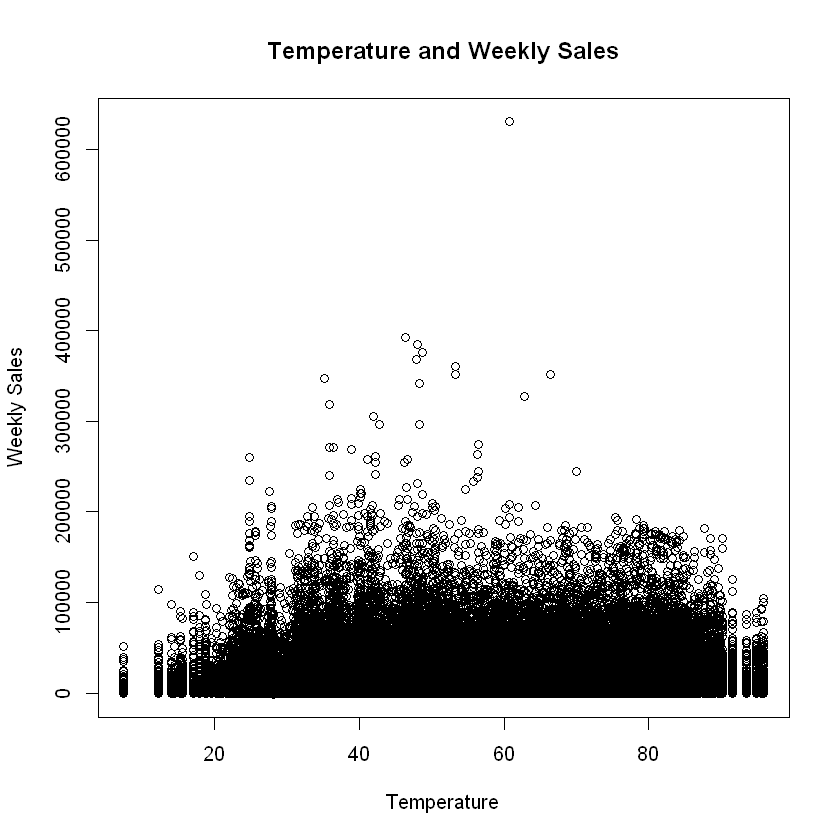

In [21]:
plot(sales_all$Temperature, sales_all$Weekly_Sales, ylab = "Weekly Sales", xlab = "Temperature", main = "Temperature and Weekly Sales")
options(scipen = 999, repr.plot.width = 7, repr.plot.height = 5)

lm() function is used to create a simple linear regression model where Weekly_Sales is the dependent or predicted variable and IsHoliday is the independent or predictor variable, we name this model slr2.

In [22]:
slr2 <- lm(Weekly_Sales ~ IsHoliday, data = sales_all)

We display the summary of the above created model slr2.  

In [23]:
summary.lm(slr2)


Call:
lm(formula = Weekly_Sales ~ IsHoliday, data = sales_all)

Residuals:
   Min     1Q Median     3Q    Max 
-19706 -15083  -9234   4865 612092 

Coefficients:
              Estimate Std. Error t value             Pr(>|t|)    
(Intercept)   17736.64      83.81 211.628 < 0.0000000000000002 ***
IsHolidayTRUE  1170.99     261.21   4.483           0.00000737 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 24730 on 97054 degrees of freedom
Multiple R-squared:  0.000207,	Adjusted R-squared:  0.0001967 
F-statistic:  20.1 on 1 and 97054 DF,  p-value: 0.000007368


The p value displayed above is less than 0.05 so it is significant which means IsHoliday does affect the weekly sales. The residual standard error value is the difference between the observed data of the dependent variable and fitted values.

Below we plot the graph of the above created model using plot function and options function to avoid exponential values being diplayed on the axis.

In [24]:
##plot(sales_all$IsHoliday, sales_all$Weekly_Sales, ylab = "Weekly Sales", xlab = "Holiday", main = "Holiday and Weekly Sales")
##options(scipen = 999, repr.plot.width = 7, repr.plot.height = 5)

lm() function is used to create a simple linear regression model where Weekly_Sales is the dependent or predicted variable and Fuel Price is the independent or predictor variable, we name this model slr1.

In [25]:
slr3 <- lm(Weekly_Sales ~ Fuel_Price, data = sales_all)

We display the summary of the above created model slr3.  

In [26]:
summary.lm(slr3)


Call:
lm(formula = Weekly_Sales ~ Fuel_Price, data = sales_all)

Residuals:
   Min     1Q Median     3Q    Max 
-20161 -15093  -9208   4890 613398 

Coefficients:
            Estimate Std. Error t value             Pr(>|t|)    
(Intercept)  24428.2     1028.9  23.742 < 0.0000000000000002 ***
Fuel_Price   -1815.7      283.5  -6.405       0.000000000151 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 24730 on 97054 degrees of freedom
Multiple R-squared:  0.0004226,	Adjusted R-squared:  0.0004123 
F-statistic: 41.03 on 1 and 97054 DF,  p-value: 0.0000000001506


The p value displayed above is greater than 0.05 so its not significant which means Fuel Price does not affect the weekly sales. The residual standard error value is the difference between the observed data of the dependent variable and fitted values.

Below we plot the graph of the above created model using plot function and options function to avoid exponential values being diplayed on the axis.

In [27]:
##plot(sales_all$Fuel_Price, sales_all$Weekly_Sales, ylab = "Weekly Sales", xlab = "Fuel Price", main = "Fuel Price and Weekly Sales")
##options(scipen = 999, repr.plot.width = 7, repr.plot.height = 5)

lm() function is used to create a simple linear regression model where Weekly_Sales is the dependent or predicted variable and CPI is the independent or predictor variable, we name this model slr1.

In [28]:
slr4 <- lm(Weekly_Sales ~ CPI, data = sales_all)

We display the summary of the above created model slr4.  

In [29]:
summary.lm(slr4)


Call:
lm(formula = Weekly_Sales ~ CPI, data = sales_all)

Residuals:
   Min     1Q Median     3Q    Max 
-19330 -15066  -9200   4891 612683 

Coefficients:
             Estimate Std. Error t value             Pr(>|t|)    
(Intercept) 19641.717    358.743  54.752 < 0.0000000000000002 ***
CPI           -10.211      2.002  -5.101          0.000000339 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 24730 on 97054 degrees of freedom
Multiple R-squared:  0.000268,	Adjusted R-squared:  0.0002577 
F-statistic: 26.02 on 1 and 97054 DF,  p-value: 0.0000003388


The p value displayed above is less than 0.05 so it is significant which means CPI does affect the weekly sales. The residual standard error value is the difference between the observed data of the dependent variable and fitted values.

Below we plot the graph of the above created model using plot function and options function to avoid exponential values being diplayed on the axis.

In [30]:
##plot(sales_all$CPI, sales_all$Weekly_Sales, ylab = "Weekly Sales", xlab = "CPI", main = "CPI and Weekly Sales")
##options(scipen = 999, repr.plot.width = 7, repr.plot.height = 5)

Below lm() function is used to create a simple linear regression model where Weekly_Sales is the dependent or predicted variable and Unemployment is the independent or predictor variable, we name this model slr1.

In [31]:
slr5 <- lm(Weekly_Sales ~ Unemployment, data = sales_all)

We display the summary of the above created model slr5.  

In [32]:
summary.lm(slr5)


Call:
lm(formula = Weekly_Sales ~ Unemployment, data = sales_all)

Residuals:
   Min     1Q Median     3Q    Max 
-20240 -15022  -9231   4892 613393 

Coefficients:
             Estimate Std. Error t value            Pr(>|t|)    
(Intercept)  21907.87     353.34   62.00 <0.0000000000000002 ***
Unemployment  -546.31      46.44  -11.76 <0.0000000000000002 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 24710 on 97054 degrees of freedom
Multiple R-squared:  0.001424,	Adjusted R-squared:  0.001414 
F-statistic: 138.4 on 1 and 97054 DF,  p-value: < 0.00000000000000022


The p value displayed above is less than 0.05 so it is significant which means Unemployment does affect the weekly sales. The residual standard error value is the difference between the observed data of the dependent variable and fitted values.

Below we plot the graph of the above created model using plot function and options function to avoid exponential values being diplayed on the axis.

In [33]:
##plot(sales_all$Unemployment, sales_all$Weekly_Sales, ylab = "Weekly Sales", xlab = "Unemployment", main = "Unemployment and Weekly Sales")
##options(scipen = 999, repr.plot.width = 7, repr.plot.height = 5)

## 5. Model Comparison

Comparing the above created models we see that Weekly sale and IsHoliday, weekly sales and CPI, Weekly sales and Unemployment Simple Linear Regression models have significant p values. All these 3 models have the dependent variables that are affected by the independent variables. <br>

The Multiple R-squared values of the all the above models are very less which means the model does not represent the data well. The model slr4 has a better Multiple R-squared value compared to the other models and has a significant p value too as mentioned above. So the best model among the Simple Linear Regression models would be the Weekly Sales and CPI model. But the Multiple R-squared values being so low we shouldn't be making any conclusions from the p values.

## 6. Multilple Linear Regression

Below lm() function is used to create a multiple linear regression model where Weekly_Sales is the dependent or predicted variable and Temperature and IsHoliday are the independent or predictor variable, we name this model mlr1.

In [34]:
mlr1 <- lm(Weekly_Sales ~ Temperature + IsHoliday, data = sales_all)

Below we display the summary of the above created model mlr1.  

In [35]:
summary.lm(mlr1)


Call:
lm(formula = Weekly_Sales ~ Temperature + IsHoliday, data = sales_all)

Residuals:
   Min     1Q Median     3Q    Max 
-19784 -15043  -9231   4882 611847 

Coefficients:
               Estimate Std. Error t value             Pr(>|t|)    
(Intercept)   16504.942    269.727  61.191 < 0.0000000000000002 ***
Temperature      21.128      4.398   4.804          0.000001556 ***
IsHolidayTRUE  1365.676    264.302   5.167          0.000000238 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 24730 on 97053 degrees of freedom
Multiple R-squared:  0.0004447,	Adjusted R-squared:  0.0004241 
F-statistic: 21.59 on 2 and 97053 DF,  p-value: 0.0000000004218


The p value displayed above is less than 0.05 so it is significant which means Temperature and IsHoliday both affect the weekly sales. The residual standard error value is the difference between the observed data of the dependent variable and fitted values.

Below lm() function is used to create a multiple linear regression model where Weekly_Sales is the dependent or predicted variable and MarkDown1, MarkDown2, MarkDown3 and MarkDown4 are the independent or predictor variables, we name this model mlr2.

In [37]:
mlr2 <- lm(Weekly_Sales ~ MarkDown1 + MarkDown2 + MarkDown3 + MarkDown4, data = sales_all)

We display the summary of the above created model mlr2.  

In [38]:
summary.lm(mlr2)


Call:
lm(formula = Weekly_Sales ~ MarkDown1 + MarkDown2 + MarkDown3 + 
    MarkDown4, data = sales_all)

Residuals:
   Min     1Q Median     3Q    Max 
-38625 -14828  -9075   4869 592362 

Coefficients:
                Estimate   Std. Error t value             Pr(>|t|)    
(Intercept) 16238.203917   120.518165 134.737 < 0.0000000000000002 ***
MarkDown1       0.146597     0.015385   9.528 < 0.0000000000000002 ***
MarkDown2       0.047543     0.007880   6.033        0.00000000161 ***
MarkDown3       0.157881     0.007282  21.681 < 0.0000000000000002 ***
MarkDown4      -0.034656     0.019755  -1.754               0.0794 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 24650 on 97051 degrees of freedom
Multiple R-squared:  0.006464,	Adjusted R-squared:  0.006423 
F-statistic: 157.9 on 4 and 97051 DF,  p-value: < 0.00000000000000022


The p value displayed above is less than 0.05 so it is significant which means MarkDown1, MarkDown2, MarkDown3 and MarkDown4 affect the weekly sales. The residual standard error value is the difference between the observed data of the dependent variable and fitted values.

Both the above models have significant p values but the Multiple R-squared values being very less the models do not fit the data well and we cannot make any defined conclusions. The Multiple R-squared value of model mlr1 is still slightly higher than model mlr2 so we can say that multiple linear regression model mlr2 is the best choice here. 

The Multiple R-squared values of the Multiple Regression Models are comparatively better than the values of the Simple Linear Regression Models. MLR models fit the data better than the SLR models.

## 7. Summary

After merging and analysing the datasets we learn that there are more than one column that postively affect the weekly sales. Unemployment, Holiday, CPI individually affect the weekly sales. The 5 MarkDown columns all play an important role in boosting the weekly sales but only at a specific period of time like during festive sale promotions. <br>

We infered that even tho we would assume that unemployment would not be a factor to boost sales, it is. CPI plays an important role too. We also learnt that even multiple columns together help to boost the weekly sales. The temperature and if its a holiday or not together predict the weekly sales. 

## 8. Recommendation

Amazon representatives should pay more attention to the factors that drastically affect the weekly sales like holidays and MarkDowns especially. The other factors also play a role in boosting sales like temperature that day, unemployment, CPI. <br>

These factors should be used well, target shoppers can be identified and approached appropriately and the weekly sales can be increased. 